In [493]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [494]:
testperson = 11

In [495]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Mads_11.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.280002,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
1,0.290142,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
2,0.300104,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
3,0.312097,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
4,0.322600,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
5,0.334372,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
6,0.345285,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
7,0.357335,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
8,0.368125,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
9,0.379948,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive


In [496]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(72728, 39)

In [497]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P01_text.txt', 'AI_HC_P01_MCQ.txt', 'AI_HC_P01_FIBQ.txt',
       'OR_HC_P01_text.txt', 'OR_HC_P01_MCQ.txt', 'OR_HC_P01_FIBQ.txt',
       'AI_SK_P01_text.txt', 'AI_SK_P01_MCQ.txt', 'AI_SK_P01_FIBQ.txt',
       'OR_SK_P01_text.txt', 'OR_SK_P01_MCQ.txt', 'OR_SK_P01_FIBQ.txt',
       'AI_KB_P01_text.txt', 'AI_KB_P01_MCQ.txt', 'AI_KB_P01_FIBQ.txt',
       'OR_KB_P01_text.txt', 'OR_KB_P01_MCQ.txt', 'OR_KB_P01_FIBQ.txt'],
      dtype=object)

In [498]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
#im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
#im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
#im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
#im_KB_OR.reset_index(drop=True, inplace=True) 

im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
#im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
#im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
#im_SK_OR.head(5)

KeyError: 0

In [ ]:
left_x =im_SK_AI['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_AI['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_AI['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_AI['right_gaze_point_on_display_area_y']*1440
t = im_SK_AI['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1167.341919,1172.532196,309.320540,318.993573
1,0.011196,1116.175461,1109.762650,305.742860,318.983681
2,0.022689,1115.516586,1118.543777,310.006328,315.271010
3,0.033867,1111.541367,1116.702194,299.732587,307.737501
4,0.045234,1115.906830,1122.065659,284.418268,281.630294
...,...,...,...,...,...
416,4.996621,305.190239,286.070881,-214.555950,-145.076727
417,5.007680,305.190239,286.070881,-214.555950,-145.076727
418,5.018364,282.989845,287.707253,-244.947996,-179.218243
419,5.029297,282.989845,287.707253,-244.947996,-179.218243


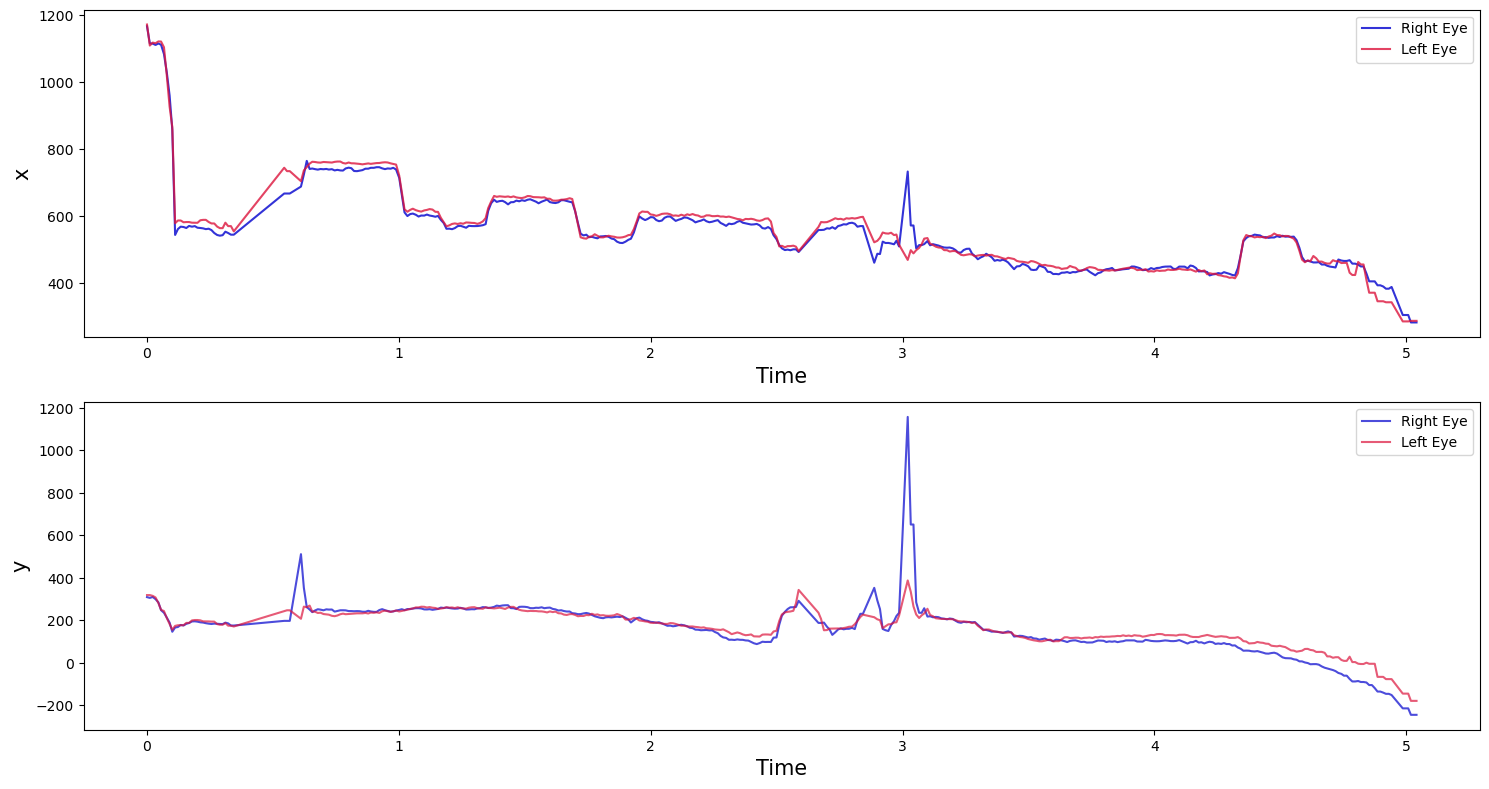

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [ ]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [ ]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
#im_SK_OR ,
im_KB_AI ,
#im_KB_OR 
]

In [ ]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,633.259621,668.805237,201.532710,231.776805
1,0.011585,629.167213,670.697479,204.116256,232.850783
2,0.022949,628.379707,672.854004,203.627923,233.408082
3,0.033168,627.910271,672.854004,203.351398,233.408082
4,0.045046,630.852394,672.217331,201.197004,231.288428
...,...,...,...,...,...
147,2.165210,763.076553,805.774994,273.666129,304.985425
148,2.177198,762.223358,805.560074,273.317120,306.100173
149,2.187715,758.020477,799.923477,276.298063,306.154654
150,2.198698,758.147125,799.923477,276.468565,306.154654


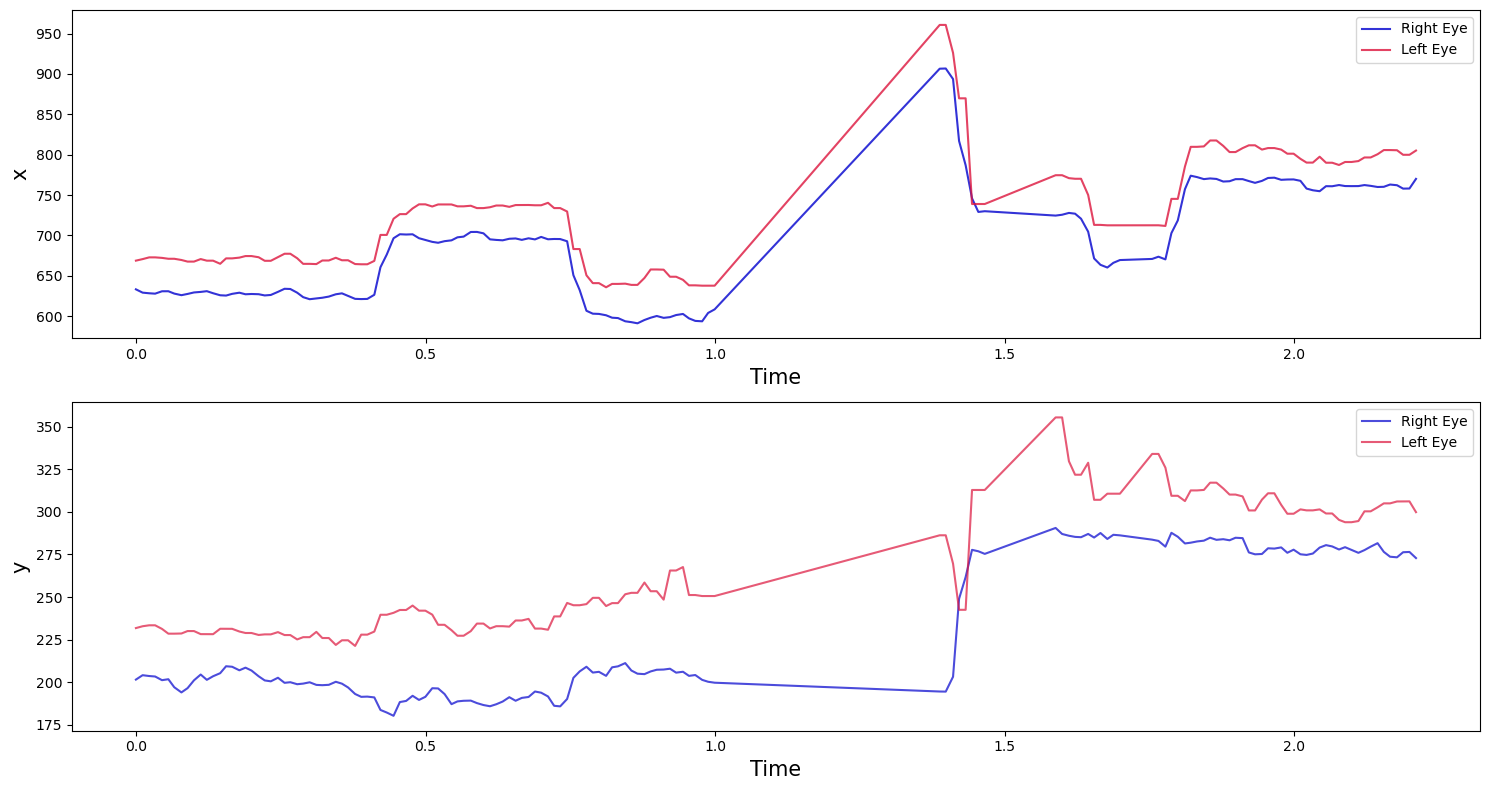

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


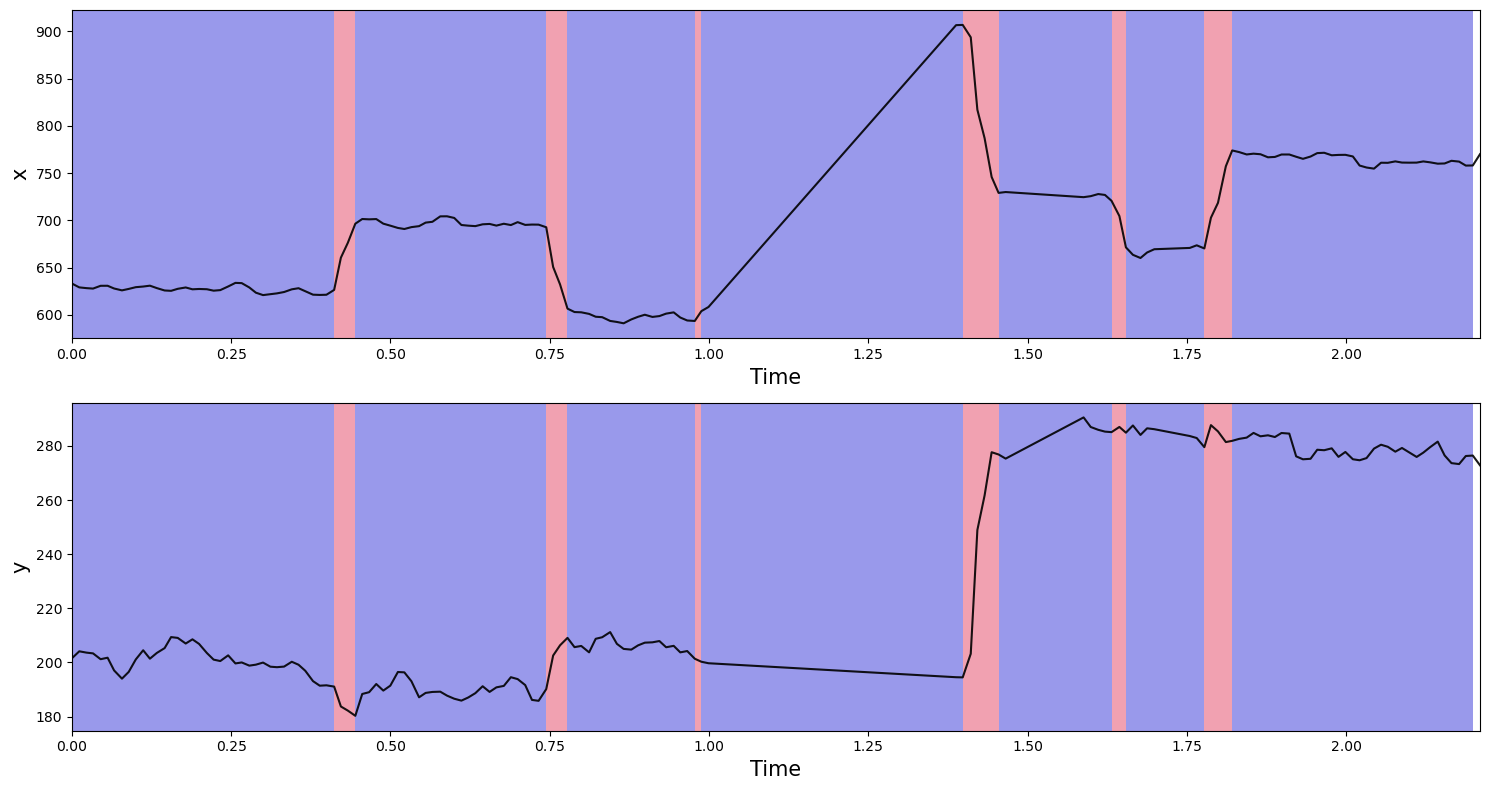

In [ ]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [ ]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [ ]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-59.932560,143.409485,642.000977,2.976660,143.487518,645.501343,0.631604,...,2.889435,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,0
1,0.010972,1,1,-59.820221,143.275192,641.387207,3.015012,143.318085,644.872009,0.631482,...,2.889206,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,1
2,0.022942,1,1,-59.832489,143.261032,641.361084,3.009599,143.280624,644.698730,0.631514,...,2.859573,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,1
3,0.033912,1,1,-59.887177,143.393921,641.948120,3.014962,143.468338,645.534424,0.631514,...,2.861206,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,1
4,0.044896,1,1,-60.114189,143.922089,644.272766,3.014704,143.901520,647.450256,0.631536,...,2.871567,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,36.539030,1,1,-39.234417,140.467514,571.804443,25.825310,140.040756,572.250244,0.595932,...,2.978424,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,1
1077,36.550002,1,1,-39.596970,140.360931,571.750610,25.437838,140.116333,572.256958,0.596846,...,2.981476,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,0
1078,36.560979,1,1,-39.741322,140.327835,571.726196,25.170404,140.168488,572.260437,0.597210,...,2.978119,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,0
1079,36.572939,1,1,-40.070984,140.280502,571.762573,25.006380,140.213104,572.309387,0.598026,...,2.983810,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Skimming,0


In [ ]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [ ]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-72.761757,141.298752,650.784729,-7.990664,143.301636,655.239502,0.657995,...,3.986572,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,0
1,0.010908,1,1,-72.605164,141.257324,650.557007,-7.903056,143.248703,655.050476,0.657708,...,3.984848,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,0
2,0.021306,1,1,-72.458710,141.054764,649.639648,-7.859016,143.040939,654.147583,0.657611,...,3.968567,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1
3,0.033070,1,1,-72.455849,141.024841,649.505981,-7.863442,142.993195,653.922791,0.657638,...,3.962555,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1
4,0.044084,1,1,-72.472168,140.979736,649.269836,-7.886866,142.960098,653.739441,0.657731,...,3.964981,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,125.041331,1,1,-70.002014,109.533592,710.998718,-6.241731,106.151207,713.978271,0.640440,...,2.892136,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,0
324,125.052229,1,1,-69.866844,109.409294,711.703735,-6.076349,105.835709,714.792603,0.640039,...,2.898651,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1
325,125.063196,1,1,-69.748283,109.188263,711.493896,-6.000596,105.453461,714.544006,0.639849,...,2.884552,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1
326,125.073642,1,1,-69.570625,108.882675,711.079834,-5.901408,105.016045,714.155273,0.639582,...,2.885162,True,AI_HC_P01_text.txt,1.0,20.0,Arial,HC,False,Immersive,1


In [ ]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [ ]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [ ]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")